In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore")

from collections import Counter

In [95]:
df = pd.read_csv("cleaned_text.csv")
df = df.dropna()
df = df.reset_index(drop=True)

df.head()

,0,1
0,secv8sports two schools that captured state ...,school
1,balochwf although quetta is the capital of b...,school
2,alaweeya512 kylenabecker i have zero issue w...,school
3,1 day to go until the west lothian schools dan...,school
4,zubymusic unlocked uk they did that in few ...,school


In [96]:
texts = df["0"].to_list()

y = [0]*len(df)
for i in range(len(df)):
    if df["1"][i] == "school":
        y[i] = 0
    if df["1"][i] == "education":
        y[i] = 1

print(len(texts), len(y))
print(Counter(y)[0], Counter(y)[1])

1288 1288
678 610


In [97]:
from sklearn.feature_extraction.text import CountVectorizer as CVt
trans = CVt(min_df=5)
vec = trans.fit_transform(texts)
dense = np.array(vec.todense())

X = np.ceil(dense/np.max(dense, axis=0))

print(X.shape, len(y))

(1288, 643) 1288


In [98]:
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))
    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values())
    print("probability of prediction:",np.fromiter(Counter(ypred).values(),dtype=float)/len(y_data))
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data,ypred))


random_classifier(y)

-----RANDOM CLASSIFIER-----
count of prediction: dict_values([671, 617])
probability of prediction: [0.52096273 0.47903727]
accuracy 0.49611801242236025
percision, recall, fscore, (array([0.52160954, 0.46839546]), array([0.51622419, 0.47377049]), array([0.51890289, 0.47106764]), array([678, 610], dtype=int64))


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confusion_plot(y_data,y_pred):

    print("ACCURACY: " + str(sum(y_pred==y_data)/len(y_data)))
    print("NEGATIVE RECALL (Y=0): " + str(sum((y_pred==0)&(y_data==0))/sum(y_data==0)))
    print("NEGATIVE PRECISION (Y=0): " + str(sum((y_pred==0)&(y_data==0))/sum(y_pred==0)))
    print("POSITIVE RECALL (Y=1): " + str(sum((y_pred==1)&(y_data==1))/sum(y_data==1)))
    print("POSITIVE PRECISION (Y=1): " + str(sum((y_pred==1)&(y_data==1))/sum(y_pred==1)))
    cm = confusion_matrix(y_data, y_pred, labels=clf.classes_)
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [101]:
test_results=[]
train_results=[]

for c in np.linspace(0.5, 2.4, 20):
    model = svm.SVC(C = c, kernel="linear")
    model.fit(X_train, y_train)

    yp_train=model.predict(X_train)
    yp_test=model.predict(X_test)

    # print(y_pred.shape)
    test_results.append([c, accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),
    recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([c,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),
    recall_score(y_train, yp_train,pos_label=1)])

Text(0.5, 1.0, 'Accuracy (Y=0) vs. C value in SVM model')

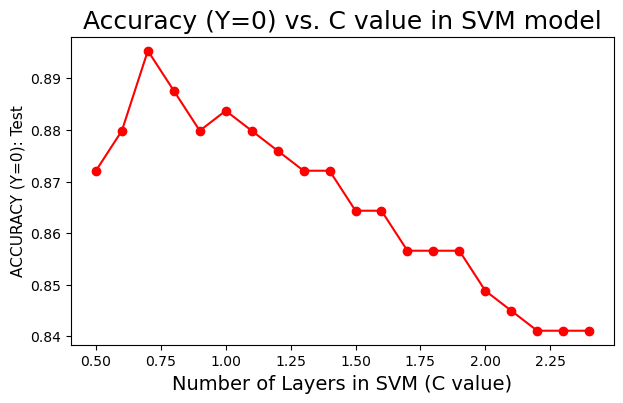

In [108]:
fig, ax1 = plt.subplots(figsize=(7,4))
#ax1.plot([i[0] for i in train_results], [j[1] for j in train_results], "b-o")
ax1.plot([i[0] for i in test_results], [j[1] for j in test_results], "r-o")
ax1.set_xlabel("Number of Layers in SVM (C value)", fontsize=14)
ax1.set_ylabel("ACCURACY (Y=0): Test", fontsize=11)
ax1.set_title("Accuracy (Y=0) vs. C value in SVM model", fontsize=18)

[[116  15]
 [ 12 115]]


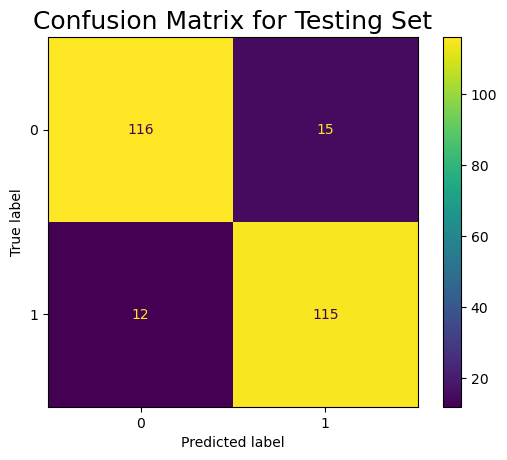

0.8953488372093024

In [106]:
model = svm.SVC(C=0.75, kernel="linear")
model.fit(X_train, y_train)

yp_test = model.predict(X_test)
cm = confusion_matrix(y_test, yp_test, labels = model.classes_)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix for Testing Set", fontsize=18)
plt.show()

accuracy_score(y_test, yp_test)

[[536  11]
 [ 26 457]]


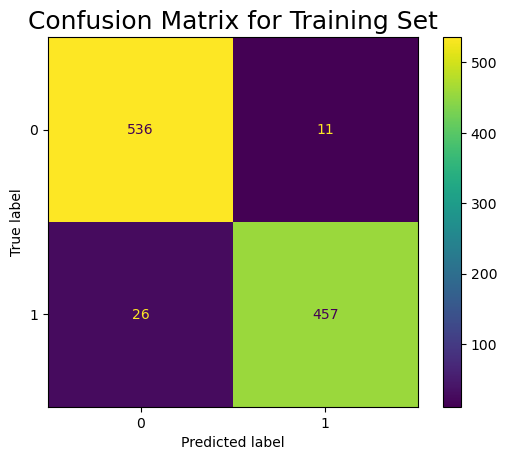

0.9640776699029127

In [107]:
yp_train = model.predict(X_train)
cm = confusion_matrix(y_train, yp_train, labels = model.classes_)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix for Training Set", fontsize=18)
plt.show()

accuracy_score(y_train, yp_train)